In [ ]:
import csv
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#u novi folder prebacuje slike za koje postoje anotacije u csv fajlu
filename = "mpii_human_pose.csv"

fields = []
rows = []
 
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)

for row in rows[:len(rows)]:
    name = row[1]
    if os.path.exists("images/"+name):
        os.replace("images/"+name, "images_extract/"+name)


FileNotFoundError: [Errno 2] No such file or directory: 'mpii_human_pose.csv'

In [3]:
#ucitava informacije o slikama koje sadrze vise od jedne osobe
file1 = open("images.txt","r")
b = []
lines = file1.readlines()
for i in range(len(lines)):
    lines[i] = lines[i].rstrip()
    #brise slike
    if os.path.exists("images_extract/" + lines[i]):
        os.remove( "images_extract/" + lines[i])


In [ ]:
# csv fajl cita kao pandas dataframe
filename = "mpii_new.csv"
df = pd.read_csv(filename)

In [15]:
#izbacuje sve redove iz tabele koji sadrze indeks slike koja se nalazi u fajlu images.txt
df = df.drop(df[df['NAME'].isin(lines)].index)

NameError: name 'lines' is not defined

In [3]:
df

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,5,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports
1,7,002058449.jpg,918,456,659,518,713,413,979,288,...,270,877,247,1112,384,1012,489,8.280870,curling,sports
2,14,029122914.jpg,-1,-1,301,473,302,346,362,345,...,220,371,213,396,309,393,290,2.204083,"truck driving, loading and unloading truck, ty...",occupation
3,15,061185289.jpg,-1,-1,-1,-1,-1,-1,-1,-1,...,288,552,355,-1,-1,-1,-1,4.143112,"truck driving, loading and unloading truck, ty...",occupation
4,16,013949386.jpg,-1,-1,-1,-1,110,385,208,355,...,303,212,153,319,123,376,39,4.431105,"truck driving, loading and unloading truck, ty...",occupation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,17367,050240222.jpg,607,689,599,542,605,416,691,410,...,232,663,228,623,289,555,333,3.480000,pushing car,transportation
11427,17368,033474347.jpg,876,461,815,380,779,296,742,303,...,214,663,223,674,286,631,260,2.003677,pushing car,transportation
11428,17369,082650067.jpg,1038,656,950,504,903,328,831,337,...,204,729,220,704,332,675,269,3.235820,pushing car,transportation
11429,17370,072772110.jpg,562,617,558,539,553,452,511,458,...,377,490,378,470,411,461,414,1.494952,pushing car,transportation


In [ ]:
#konvertuje df u csv i cuva ga
x = df.to_csv('mpii_new.csv', index=False)

In [ ]:
filename = "mpii_new.csv"

fields = []
rows = []
 
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)

#Izdvajanje trening podataka
for row in rows[:8000]:
    name = row[1]
    if os.path.exists("images_extract/"+name):
        os.replace("images_extract/"+name, "images_training/"+name)
        

#Izdvajanje validacionih podataka
for row in rows[8000:9143]:
    name = row[1]
    if os.path.exists("images_extract/"+name):
        os.replace("images_extract/"+name, "images_valid/"+name)
        
        
#Izdvajanje test podataka
for row in rows[9143:]:
    name = row[1]
    if os.path.exists("images_extract/"+name):
        os.replace("images_extract/"+name, "images_test/"+name)

1


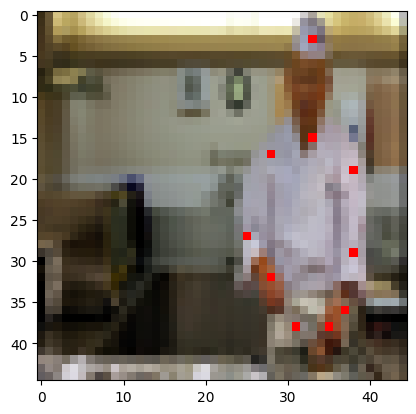

In [32]:
output_path = 'heat_maps_test_plain'
path = 'images_test'

if not os.path.exists(output_path):
    os.makedirs(output_path)

brojac = 0 

for image in os.listdir(path)[654:]:
    brojac += 1
    
    img = Image.open(os.path.join(path, image))
    mapa = img.resize((45, 45))
    mapa = np.array(mapa)
    

    rezultat = df[df['NAME'] == image]
    rezultat_numpy = rezultat.to_numpy()[0]
    
    boja = [255, 0, 0]
    sirina = 0.5
    sloj_brojac = -1
    joints = 14
    x_sum = 0
    y_sum = 0

    for k in range(2, len(rezultat_numpy) - 3, 2):
        #sloj_brojac += 1
        if rezultat_numpy[k] == -1 or rezultat_numpy[k + 1] == -1:
            continue
        x_sum += rezultat_numpy[k]
        y_sum += rezultat_numpy[k+1]
        x = round(rezultat_numpy[k] * 45/ img.size[0])
        y = round(rezultat_numpy[k + 1] * 45 / img.size[1])
        
        # for i in range(max(0, y - sirina), min(mapa.shape[1], y + sirina)):
        #     for j in range(max(0, x - sirina), min(mapa.shape[2], x + sirina)):
        mapa[max(0,min(mapa.shape[1]-1, y)), max(0,min(mapa.shape[0]-1, x))] =  boja
    x_center = round(x_sum/joints*45/img.size[0])
    y_center = round(y_sum/joints*45/img.size[1])
    mapa[max(0,min(mapa.shape[1]-1, y_center)), max(0,min(mapa.shape[0]-1, x_center))] =  boja
    #print(brojac) 
    print(x_center)
    plt.imshow(mapa, cmap='viridis')
    # for k in range(14):
    #     mapa[14] += mapa[k]
    # mapa[14] = (14 - mapa[14]) / 14

    
    # loc = os.path.join(output_path, 'hm_' + image.replace('.jpg', '.npy'))
    # np.save(loc, mapa)

    if brojac >= 1:
        break

In [ ]:
def gaussian_2d(shape, center, sigma):
    x = np.linspace(0, shape[1] - 1, shape[1])
    y = np.linspace(0, shape[0] - 1, shape[0])
    x, y = np.meshgrid(x, y)
    d = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    gauss = np.exp(-(d**2 / (2.0 * sigma**2)))
    return gauss

[[4.42297854e-36 7.24682432e-36 1.18439045e-35 ... 6.14140037e-30
  4.04023472e-30 2.65130717e-30]
 [6.60656167e-36 1.08245137e-35 1.76911294e-35 ... 9.17335228e-30
  6.03486081e-30 3.96023271e-30]
 [9.84351977e-36 1.61281041e-35 2.63590942e-35 ... 1.36679379e-29
  8.99170773e-30 5.90059262e-30]
 ...
 [1.33475011e-44 2.18691985e-44 3.57420971e-44 ... 1.85332910e-38
  1.21924710e-38 8.00101675e-39]
 [8.00510277e-45 1.31159518e-44 2.14361593e-44 ... 1.11152565e-38
  7.31237872e-39 4.79857321e-39]
 [4.78903622e-45 7.84659112e-45 1.28241381e-44 ... 6.64967929e-39
  4.37461548e-39 2.87073653e-39]]


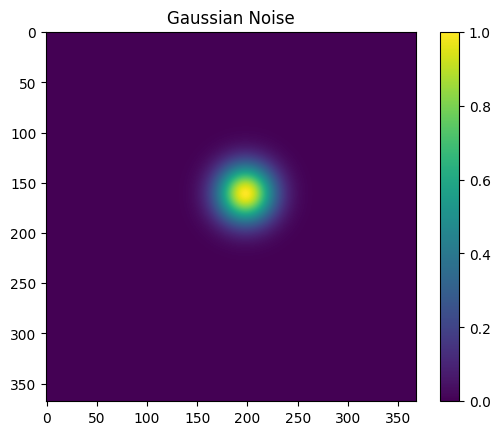

1


In [ ]:
output_path = 'hmi_training_one'
path = 'images_training_one'

if not os.path.exists(output_path):
    os.makedirs(output_path)

brojac = 0

for image in os.listdir(path):
    brojac += 1

    img_path = os.path.join(path, image)
    img = Image.open(img_path)
    mapa = np.zeros((368, 368))
    
    # Convert to grayscale if not already
    # if mapa.ndim == 3:
    #     mapa = np.mean(mapa, axis=2)
    
    #print(image)
    rezultat = df[df['NAME'] == image.rstrip('_012345789.jpg') + '.jpg']
    #print(image.strip('_012345789.jpg') + '.jpg')
    if rezultat.empty:
        print(f"No data found for {image}")
        continue

    rezultat_numpy = rezultat.to_numpy()[0]

    
    x_sum = 0
    y_sum = 0
    valid_joints = 14

    for k in range(2, len(rezultat_numpy) - 3, 2):
        if rezultat_numpy[k] == -1 or rezultat_numpy[k + 1] == -1:
            continue
        x_sum += rezultat_numpy[k]
        y_sum += rezultat_numpy[k + 1]

    if valid_joints == 0:
        print(f"No valid joints found for {image}")
        continue

    x_center = round((x_sum / valid_joints) * 368 / img.size[0])
    y_center = round((y_sum / valid_joints) * 368 / img.size[1])
    
    center_gauss_peak = gaussian_2d(mapa.shape, (x_center, y_center), sigma=20)
    mapa = np.maximum(mapa, center_gauss_peak)
    #print(mapa)
    loc = os.path.join(output_path, 'hmi_' + image.replace('.jpg', '.npy'))
    np.save(loc, mapa)
    # plt.imshow(mapa)
    # plt.title("Gaussian Noise")
    # plt.colorbar()
    # plt.show()

    # print(brojac) 
    # if brojac >=1:
    #      break



In [18]:
#generisanje heat mapa za trening set
output_path = 'heat_maps_training_one'
path = 'images_training_one'

if not os.path.exists(output_path):
    os.makedirs(output_path)

brojac = 0 


for image in os.listdir(path):
    brojac += 1
    
    img = Image.open(os.path.join(path, image))
    mapa = np.zeros((15, 45, 45))
    

    rezultat = df[df['NAME'] == image.rstrip('_012345789.jpg') + '.jpg']
    rezultat_numpy = rezultat.to_numpy()[0]

    
    boja = 1
    sirina = 0.5
    sloj_brojac = -1

    for k in range(2, len(rezultat_numpy) - 3, 2):
        sloj_brojac += 1
        if rezultat_numpy[k] == -1 or rezultat_numpy[k + 1] == -1:
            continue

        x = round(rezultat_numpy[k] * 45/ img.size[0])
        y = round(rezultat_numpy[k + 1] * 45 / img.size[1])
        

        # for i in range(max(0, y - sirina), min(mapa.shape[1], y + sirina)):
        #     for j in range(max(0, x - sirina), min(mapa.shape[2], x + sirina)):
        mapa[sloj_brojac, max(0,min(mapa.shape[2]-1, y)), max(0,min(mapa.shape[1]-1, x))] = boja
    
    for k in range(14):
        mapa[14] += mapa[k]
    mapa[14] = mapa[14] > 0

    
    loc = os.path.join(output_path, 'hm_' + image.replace('.jpg', '.npy'))
    np.save(loc, mapa)
    
    print(brojac) 

IndexError: index 15 is out of bounds for axis 0 with size 15

In [37]:
#generisanje heat mapa za validacioni set
output_path = 'heat_maps_valid_plain'
path = 'images_valid'

if not os.path.exists(output_path):
    os.makedirs(output_path)

brojac = 0 


for image in os.listdir(path):
    brojac += 1
    
    img = Image.open(os.path.join(path, image))
    mapa = np.zeros((15, 45, 45))
    

    rezultat = df[df['NAME'] == image]
    rezultat_numpy = rezultat.to_numpy()[0]

    
    boja = 1
    sirina = 0.5
    sloj_brojac = -1

    for k in range(2, len(rezultat_numpy) - 3, 2):
        sloj_brojac += 1
        if rezultat_numpy[k] == -1 or rezultat_numpy[k + 1] == -1:
            continue

        x = round(rezultat_numpy[k] * 45/ img.size[0])
        y = round(rezultat_numpy[k + 1] * 45 / img.size[1])
        

        # for i in range(max(0, y - sirina), min(mapa.shape[1], y + sirina)):
        #     for j in range(max(0, x - sirina), min(mapa.shape[2], x + sirina)):
        mapa[sloj_brojac, max(0,min(mapa.shape[2]-1, y)), max(0,min(mapa.shape[1]-1, x))] = boja
    
    for k in range(14):
        mapa[14] += mapa[k]
    mapa[14] = mapa[14] > 0

    
    loc = os.path.join(output_path, 'hm_' + image.replace('.jpg', '.npy'))
    np.save(loc, mapa)
    
    print(brojac) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
